<a href="https://colab.research.google.com/github/frfarhath/ChefConnect/blob/main/HisGrandientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enables the estimator
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import pandas as pd
from google.colab import files

In [15]:
uploaded = files.upload()

Saving filename.csv to filename.csv


In [16]:
for filename in uploaded.keys():
    data = pd.read_csv(filename)
    print(f"Loaded: {filename}")
    display(data.head())

Loaded: filename.csv


,Date,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,31/12/2019,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,31/12/2019,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,31/12/2019,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,31/12/2019,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,31/12/2019,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [18]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4', 'ACD']]
X_ph = X_turbidity.copy()
X_colour = X_turbidity.copy()

y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']

In [19]:
def train_and_evaluate(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===== {label} Prediction =====")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))

In [20]:
train_and_evaluate(X_turbidity, y_turbidity, "Turbidity")
train_and_evaluate(X_ph, y_ph, "PH")
train_and_evaluate(X_colour, y_colour, "Colour")


===== Turbidity Prediction =====
Mean Squared Error: 56.30612553507198
R² Score: 0.5574859959008751

===== PH Prediction =====
Mean Squared Error: 0.01695815898451783
R² Score: 0.8263616246817

===== Colour Prediction =====
Mean Squared Error: 761.2283925932569
R² Score: 0.6128457258762572


In [40]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

In [57]:
def run_hgb_tuning(X, y, label):
    print(f"--- Hyperparameter Tuning for {label} ---")

    # Split into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize model
    model = HistGradientBoostingRegressor(random_state=42)

    # Define hyperparameter distribution
    param_dist = {
        'learning_rate': uniform(0.01, 0.3),
        'max_iter': randint(100, 1000),
        'max_depth': randint(3, 15),
        'min_samples_leaf': randint(10, 100),
        'l2_regularization': uniform(0, 1)
    }

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=50,
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=-1,
        scoring='neg_mean_squared_error'
    )

    # Fit the model
    random_search.fit(X_train, y_train)

    # Best parameters
    print("Best Parameters:", random_search.best_params_)

    # Predictions and evaluation
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{label} - Test MSE: {mse:.4f}")
    print(f"{label} - Test R²: {r2:.4f}\n")


In [58]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4', 'ACD']]
X_ph = X_turbidity.copy()
X_colour = X_turbidity.copy()

y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']


In [59]:
run_hgb_tuning(X_turbidity, y_turbidity, "Turbidity")
run_hgb_tuning(X_ph, y_ph, "PH")
run_hgb_tuning(X_colour, y_colour, "Colour")

--- Hyperparameter Tuning for Turbidity ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'l2_regularization': np.float64(0.5632882178455393), 'learning_rate': np.float64(0.12562495076197483), 'max_depth': 12, 'max_iter': 664, 'min_samples_leaf': 11}
Turbidity - Test MSE: 45.5504
Turbidity - Test R²: 0.6420

--- Hyperparameter Tuning for PH ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'l2_regularization': np.float64(0.835302495589238), 'learning_rate': np.float64(0.10623401949152074), 'max_depth': 8, 'max_iter': 563, 'min_samples_leaf': 12}
PH - Test MSE: 0.0136
PH - Test R²: 0.8612

--- Hyperparameter Tuning for Colour ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'l2_regularization': np.float64(0.5632882178455393), 'learning_rate': np.float64(0.12562495076197483), 'max_depth': 12, 'max_iter': 664, 'min_samples_leaf': 11}
Colour - Test MSE: 492.3890
Colour - Test R²: 0.7496



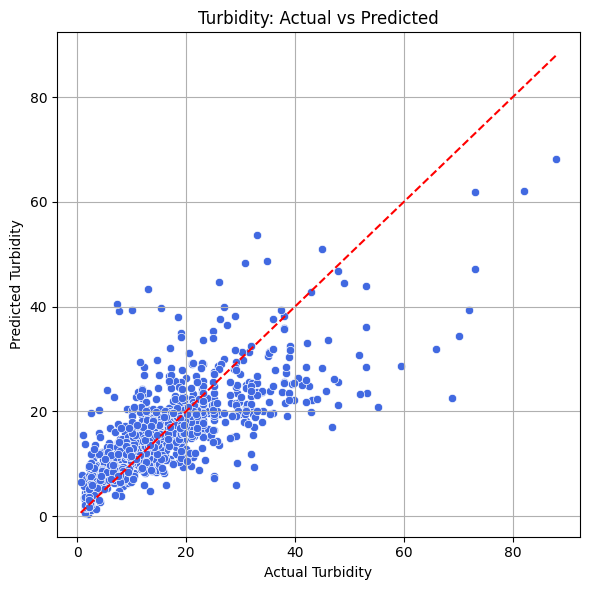

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------- Turbidity -----------
X_train, X_test, y_train, y_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Turbidity")
plt.ylabel("Predicted Turbidity")
plt.title("Turbidity: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

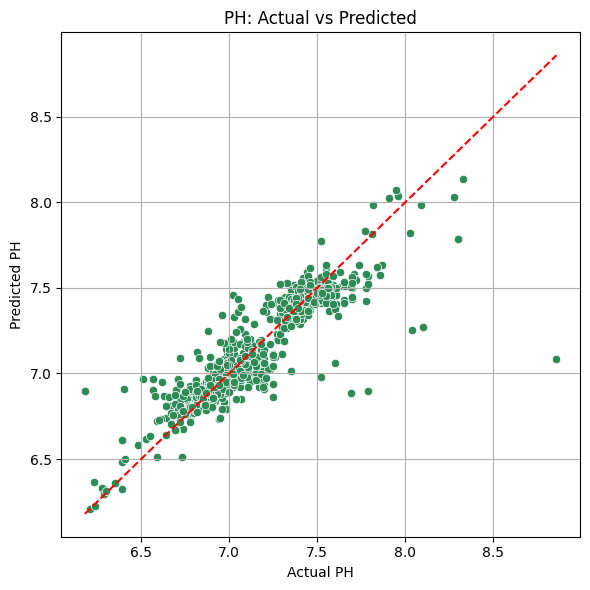

In [66]:
# ----------- PH -----------
X_train, X_test, y_train, y_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='seagreen', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual PH")
plt.ylabel("Predicted PH")
plt.title("PH: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

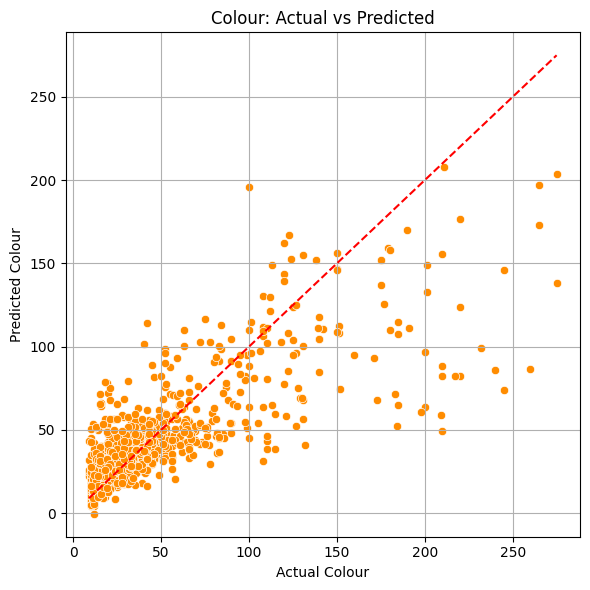

In [64]:
# ----------- Colour -----------
X_train, X_test, y_train, y_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='darkorange', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Colour")
plt.ylabel("Predicted Colour")
plt.title("Colour: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()